<a href="https://colab.research.google.com/github/JiSu0708/ESAA-YB/blob/main/0331_%EA%B3%BC%EC%A0%9C(ESAA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽 가이드** 118-145p

## 05. 데이터 전처리  
- 결손값, NaN, Null 값은 허용되지 않음 -> 고정된 다른 값으로 변환해야 함
1. Null 값이 얼마 되지 않는 경우 -> 피처의 평균값 등으로 간단히 대체
2. Null 값이 대부분인 경우 -> 해당 피처 드롭
3. 해당 피처가 중요독 높은 피처이거나 Null을 단순히 피처의 평균값으로 대체할 경우 왜곡이 심할 경우 -> 정밀한 대체 값 설정

사이킷런의 머신러닝 알고리즘 - 문자열 값을 입력값으로 허용하지 않음   
-> 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함.  
- 카테고리형 피처 -> 코드 값으로 표현
- 텍스트형 피처 -> 벡터화 또는 삭제

### 데이터 인코딩   
- 레이블 인코딩(Label encoding): 카테고리 피처 -> 코드형 숫자 값으로 변환  
- 원-핫 인코딩(One Hot encoding): 피처 값의 유형에 따라 새로운 피처 추가 -> 고유 값에 해당하는 칼럼에만 1 표시, 나머지 칼럼에는 0 표시
  1. 행 형태 피처의 고유 값 -> 열 형태로 차원 변환  
  2. 고유 값에 해당하는 칼럼에만 1 표시  
  3. 나머지 칼럼에는 0 표시

- 레이블 인코딩 - LabelEncoder

In [39]:
# 레이블 인코딩 -> LabelEncoder 클래스로 구현

from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [40]:
# 문자열이 어떤 숫자 값으로 인코딩됐는지 classes_ 속성값으로 확인
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [41]:
# classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


숫자 변환 값은 단순 코드. 숫자 값에 따른 순서도 중요도로 인식되면 안 됨.  
-> 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에 적용하지 않아야 함.  
     -> 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식: **원-핫 인코딩(One-Hot Encoding)**

- 원-핫 인코딩 - OneHotEncoder  
여러 개의 속성 중 단 한 개의 속성만 1로 표시  

\* 주의할 점  
1. OneHOtEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 함
2. 입력 값으로 2차원 데이터 필요

In [42]:
# 원-핫 인코딩 -> OneHotEncoder 클래스로 쉽게 변환
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)
     

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


get_dummies()

In [43]:
# 판다스에서 원-핫 인코딩을 더 쉽게 지원하는 API -> get_dummies()
# get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능

import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화   
피처 스케일링(feature scaling): 서로 다른 변수의 값 범위르 일정한 수준으로 맞추는 작업  

\* 대표적인 방법
- 표준화(Standardization): 데이터의 피처 각각이 평균 0, 분산 1인 가우시안 정규 분포를 가진 값으로 변환  
xi_new = (xi - mean(x)) / stdev(x)

- 정규화(Normalization): 서로 다른 피처의 크기를 통일하기 위해 크기 변환. 개별 데이터의 크기를 모두 똑같은 단위로 변경. 0~1.  
xi_new = (xi-min(x)) / (max(x)-min(x))


\* 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화의 차이  
사이킷런   
- 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환.  
-> 개별 벡터를 모든 피처 벡터의 크기로 나눠 줌.  
xi_new = xi / (xi^2 + yi^2 + zi^2)**0.5 

### StandardScaler
- 표준화

In [44]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('featrue들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

featrue들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [45]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('featrue들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

featrue들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터값을 0과 1 사이의 범위 값으로 변환
- 음수 값이 있으면 -1에서 1 값으로 변환

In [46]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('featrue들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

featrue들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- fit(): 데이터 변환을 위한 기준 정보 설정
- transform(): 설정된 정보를 이용해 데이터 변환
- fit_transform(): fit()과 transform() 한 번에 적용  
학습 데이터 세트로 fit()과 transform()을적용하면 **테스트 데이터 세트로는 다시 fit()을 수행하지 않고 transform() 변환을 적용**해야 함.   
즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함.

In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [48]:
# 학습 데이터 train_array부터 MinMaxScaler 이용해 변환

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [49]:
# 테스트 데이터 test_array 변환

# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함 원본 5 -> 1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))
     

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 스케일링이 맞지 않음 확인  
-> 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 **학습 데이터**의 스케일링 기준에 따라야 함.  
-> **테스트 데이터에 다시 fit()을 적용해서는 안 되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함.**

In [50]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_array.reshape(-1, 2)))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [[0 1]
 [2 3]
 [4 5]]


fit_transform()
- fit() -> transform()을 순차적으로 수행하는 메소드  -> 학습 데이터(O), 테스트 데이터(X)
- 전체 데이터 세트에 스케일링을 적용한 뒤 학습/테스트 데이터 세트로 분리하는 것이 더 바람직.

\* 스케일링 변환 시 유의할 점_요약  
1. 전체 데이터의 스케일링 변환을 적용한 뒤 학습/테스트 데이터로 분리
2. 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

## 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/23-1 ESAA YB/titanic_train.csv.csv')
titanic_df.head(3)
     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [53]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


판다스의 object 타입 = string 타입

Null 값 처리 - fillna()

In [54]:
# 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 함
# 여기서는 DataFrame의 fillna() 함수 사용해 Null 값을 평균 또는 고정 값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [55]:
# 피처들의 값 분류
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 속성값이 제대로 정리되지 않음 확인  
-> 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임  
-> 앞 문자만 추출- str

In [56]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]  # Cabin열의 앞 문자만 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [57]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
# Survived 0: 사망, 1: 생존
     

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

시본(Seaborn) 패키지
- 맷플롯립 기반. 데이터 분석을 위한 시각화.
- 좀 더 세련된 비주얼
- 쉬운 API
- 편리한 판다스 DataFrame과의 연동

<Axes: xlabel='Sex', ylabel='Survived'>

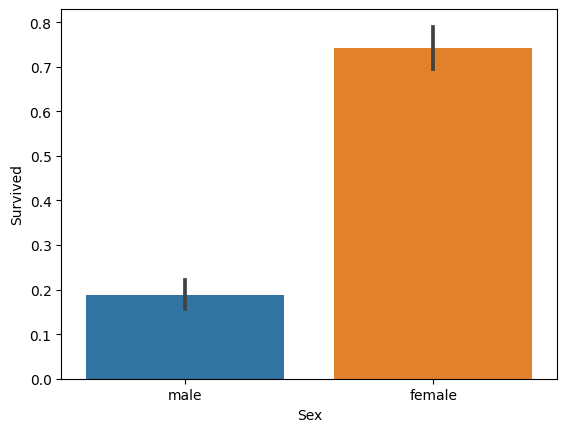

In [58]:
# barplot() - 가로 막대 차트
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

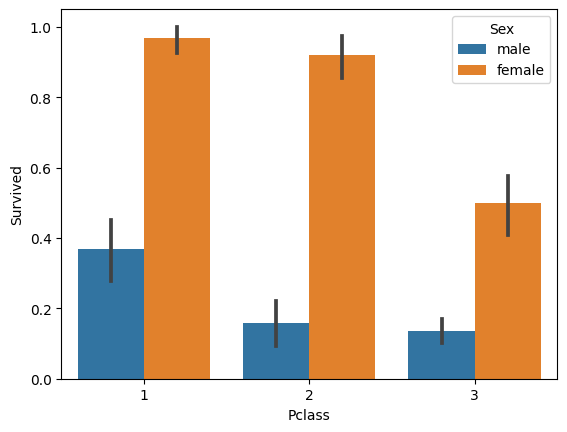

In [59]:
# 객실 등급별 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

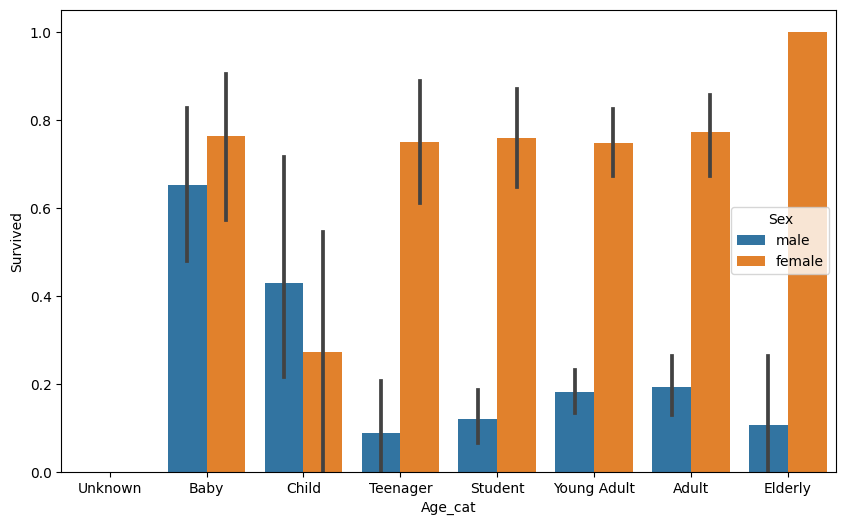

In [60]:
# Age에 따른 생존 확률
## 값 종류가 많기 때문에 범위별로 분류해 카데고리 값 할당

# 입력 age에 따라 구분 값을 반환하는 함수 설정, DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown' #-1 이하의 오류 값은 Unknown으로 분류
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [61]:
from sklearn import preprocessing

# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    # LabelEncoder 객체는 카테고리 값의 유형 수에 따리 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()
     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


transform_features()
- 데이터의 전처리를 전체적으로 호출하는 함수
- Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성

In [62]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df
     

In [63]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/23-1 ESAA YB/titanic_train.csv.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 데이터 가공
X_titanic_df = transform_features(X_titanic_df)

In [64]:
from sklearn.model_selection import train_test_split
# 테스트 데이터 세트 크기: 20%
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)
     

1. train_test_split()으로 분리학 학습/테스트 데이터 기반
2. 머신러닝 모델 학습(fit), 예측(predict)
3. 정확도(accuracy)로 예측 성능 평가 - accuracy_score() API 사용

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11) #random_state=11은 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

# 3개의 알고리즘 중 LogisticRefression이 타 알고리즘에 비해 높은 정확도

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


최적화 작업 수행X, 데이터 양 충분X -> 어떤 알고리즘이 가장 성능이 좋다고 아직 평가할 수 없음   
-> 교차 검증으로 결정 트리 모델 좀 더 평가

KFold

In [66]:
# 사이킷런의 KFold 클래스를 이요해 교차 검증 수행
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


cross_val_score

In [67]:
# 사이킷런의 cross_val_score을 이용해 교차 검증 수행
# cross_val_score()은 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문에 KFold랑 평균 정확도가 조금 다름
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {0:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 2.0000
교차 검증 3 정확도: 3.0000
교차 검증 4 정확도: 4.0000
평균 정확도: 0.7879


GridSearchCV

In [68]:
# 사이킷런의 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


## 07. 정리  
### 사이킷런  
- 머신러닝 알고리즘 제공
- 머신러닝 애플리케이션 구현
- 쉽고 직관적인 API 프레임워크
- 편리하고 다양한 모듈 지원
- 파이썬 계열의 대표적인 머신러닝 패키지


### 머신러닝 애플리케이션 구성 방식
1. 데이터 전처리 작업(데이터의 가공 및 변환)
2. 데이터 세트 분리 작업(데이터를 학습 데이터와 테스트 데이터로 분리)
3. 학습 데이터 기반 머신러닝 알고리즘 적용 -> 모델을 학습시킴
4. 학습된 모델 기반 테스트 데이터에 대한 예측 수행
5. 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가 수행


### 데이터 전처리 작업  
머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터 사전 처리
- 데이터 클렌징 작업(오류 데이터의 보정, 결손값(Null) 처리)
- 인코딩 작업(레이블 인코딩, 원-핫 인코딩)
- 데이터의 스케일링/정규화 작업  


### 교차 검증 수행 이유
- 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 함 
- 테스트 데이터의 건수 부족/고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가 -> 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성 높음

### 교차 검증
- 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증 수행
- 사이킷런에서 다양한 클래스(KFold, StratifiedKFold)와 함수(cross_val_score()) 제공
- 머신러닝 모델의 최적의 하이퍼 파라미터- 교차 검증을 통해 추출(GridSearchCV)